In [26]:
from numpy.random import randint
import numpy as np # for importing numpy
import pandas as pd # for importing pandas
import matplotlib.pyplot as plt # for importing matplotlib
import seaborn as sns # seaborn is used to plot
import random
import os
from scipy import stats


# Load the data from a csv file
data = pd.read_csv('data/klout-scores.csv', header=None, names=['scores'])
data.head()

,scores
0,25.104179
1,60.908747
2,23.222238
3,51.553491
4,22.629690


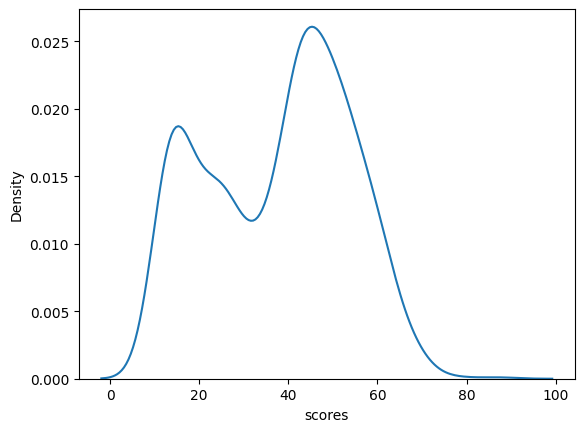

In [27]:
# plot the sample and note the bimodal distribution shape
# the first peak are social media consumers, second peak influencers
p = sns.kdeplot(data.scores)

# sample size
n = data.scores.count()

# The confidence coeficient
confidence_coef = 0.95

# the alpha level
alpha = 1 - confidence_coef

In [28]:
# First we need our sample mean, this is called our point estimate
klout_xbar = data.scores.mean()
klout_xbar

37.71905483253817

In [29]:
# we also need the standard error of the sample
# since our sample size is large (> 30) we can use the sample standard deviation as an approximation of sigma
klout_s = data.scores.std()
klout_s

16.044314979048984

In [30]:
# Then we need to find the zscore to calculate the lower and upper bounds of our confidence interval
# this is called  a critical value
critical_value = stats.norm.ppf(alpha/2) * -1
critical_value

1.959963984540054

In [31]:
# an easier way to get critical value is to use scipy.stats interval function. The alpha 
# .95 being a little misleading since it is not our alpha but our confidence coefficient
zscore_interval = stats.norm.interval(alpha=confidence_coef)
zscore_interval

/tmp/ipykernel_1664731/3269949689.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  zscore_interval = stats.norm.interval(alpha=confidence_coef)


(-1.959963984540054, 1.959963984540054)

In [32]:
# we need the standard error to calculate the bounds
klout_se = klout_s / np.sqrt(n)
klout_se

0.4956105448465624

In [33]:
# calculate the lower and upper bounds kloud score 
# for the confidence interval

klout_ci_mean_lower = klout_xbar - critical_value * klout_se
klout_ci_mean_upper = klout_xbar + critical_value * klout_se
klout_ci_mean_lower, klout_ci_mean_upper



(36.747676014280636, 38.690433650795704)